# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

**Description of fnlwgt (final weight)**

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**The dataset contains 32560 rows and 15 columns.It contains both int and object type data.**

In [6]:
# check for missing values
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

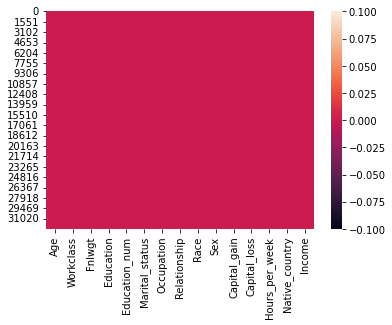

In [7]:
sns.heatmap(df.isna())

**No null values found**

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

These are the number of unique values present in each columns.

In [9]:
for i in df.columns:
        print(df[i].value_counts())
        print('------------------------------------------')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
------------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
------------------------------------------
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th         

In [10]:
df.isin([" ?"]).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

**Workclass,Occupation,Native_country holds "?" value.so, the respective rows have to be dropped from the dataset.Also, Capital_gain,Capital_loss has more 0s. These columns are not required for the analysis.Therefore, these would also be dropped.**

In [11]:
# Dropping the columns Capital_gain,Capital_loss
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)
# Dropping Fnlwgt as it is not required for analysis
df.drop("Fnlwgt",axis=1,inplace=True)

In [12]:
df.replace(to_replace=" ?", value=np.nan, inplace= True)
df =df.dropna()
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [13]:
df.isin([" ?"]).sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [14]:
df.shape

(30161, 12)

In [15]:
#Lets subset the data as we have big sample
subset=df.sample(frac=0.15)
df=subset
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
6867,32,Private,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,White,Female,20,United-States,<=50K
11398,37,Private,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,40,United-States,<=50K
18027,50,Private,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
5419,45,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Amer-Indian-Eskimo,Male,40,United-States,<=50K
2748,20,Private,9th,5,Never-married,Machine-op-inspct,Own-child,White,Female,11,Nicaragua,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
15017,52,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,>50K
16367,53,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
18482,28,Private,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,50,Germany,<=50K
1477,17,Private,11th,7,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Female,24,United-States,<=50K


# Exploratory Data Analysis

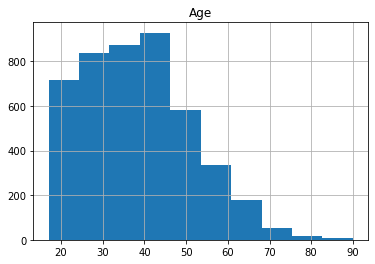

In [16]:
df["Age"].hist(grid=True)
plt.title("Age")
plt.show()

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

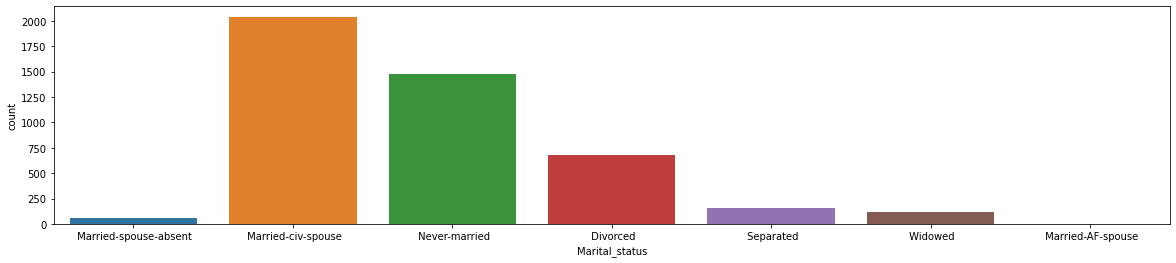

In [17]:
plt.figure(figsize=(20,4))
sns.countplot(df.Marital_status)


<AxesSubplot:xlabel='Sex', ylabel='count'>

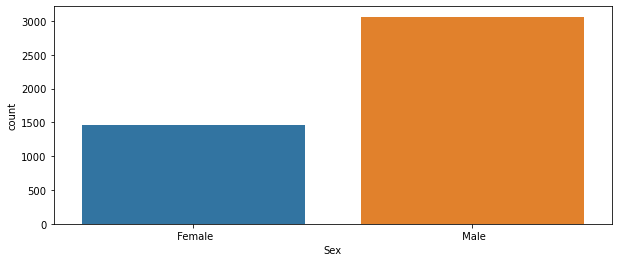

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(df.Sex)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

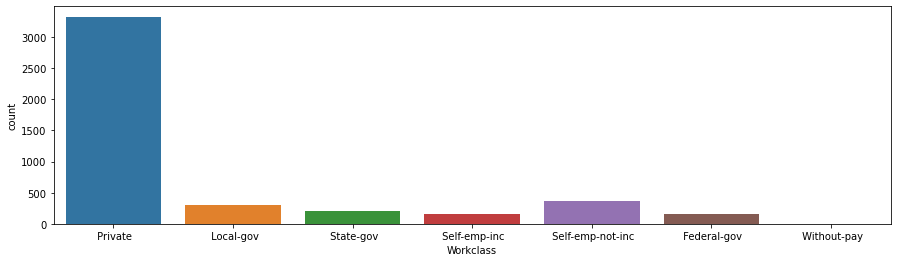

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(df['Workclass'])

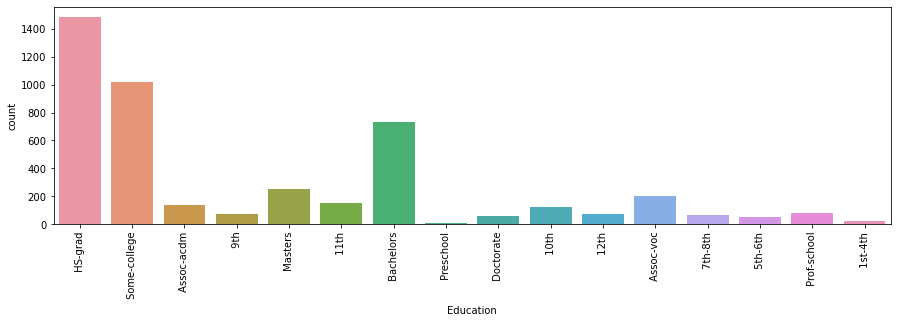

In [20]:
#Count plot for Education
plt.figure(figsize=(15,4))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

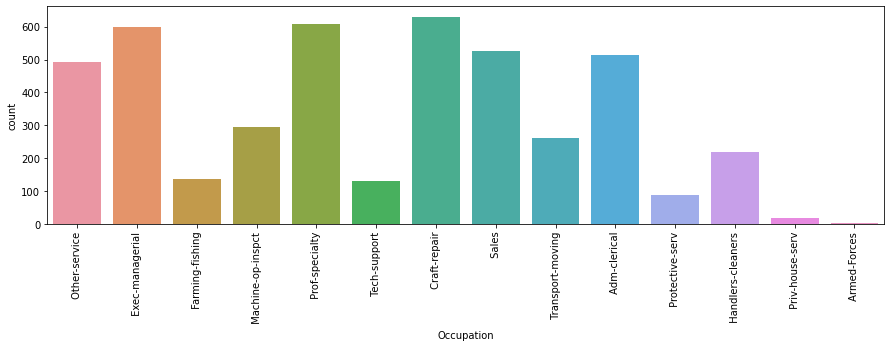

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()

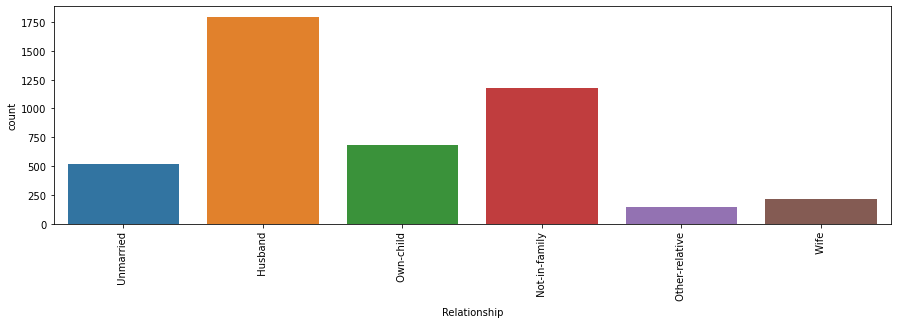

In [22]:
plt.figure(figsize=(15,4))
sns.countplot(df["Relationship"])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Race', ylabel='count'>

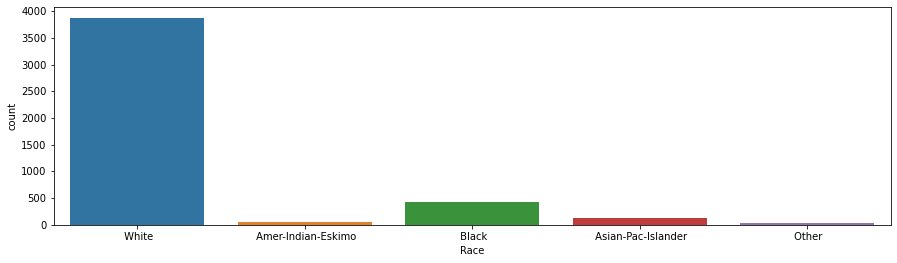

In [23]:
plt.figure(figsize=(15,4))
sns.countplot(df.Race)

<AxesSubplot:xlabel='Income', ylabel='count'>

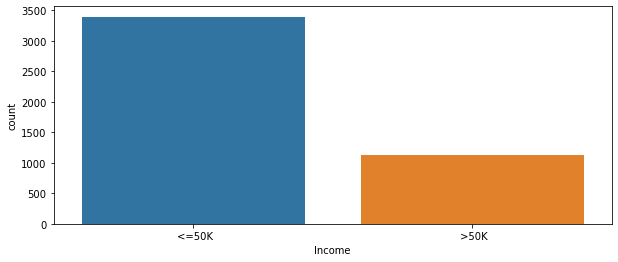

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(df.Income)

**From above plotting we can observe**

There are more people from 25-45 age group.

Most of the people have income <=50K.

Most of the people working in Private sector which is high compared to others.

The count of HS-grad is high followed by some college and the count of doctorate is very less compared to others.

The married people have high counts followed by the Singles or never married people.

The people who are in the position of Exce-managerial and Prof-specialty have higher count and the people in Priv-house-serv 
have very least counts.

In Relationship Husband has more values.

The count white is more in the dataset.

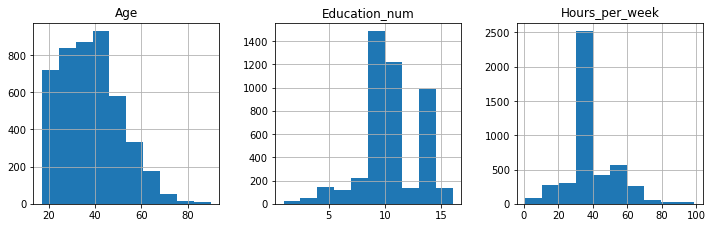

In [25]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

We can observe there there are more people from 25-45 age group.

Mostly people having education for 9-11 followed by 13 years.

Mostly people work 40 hours per week.

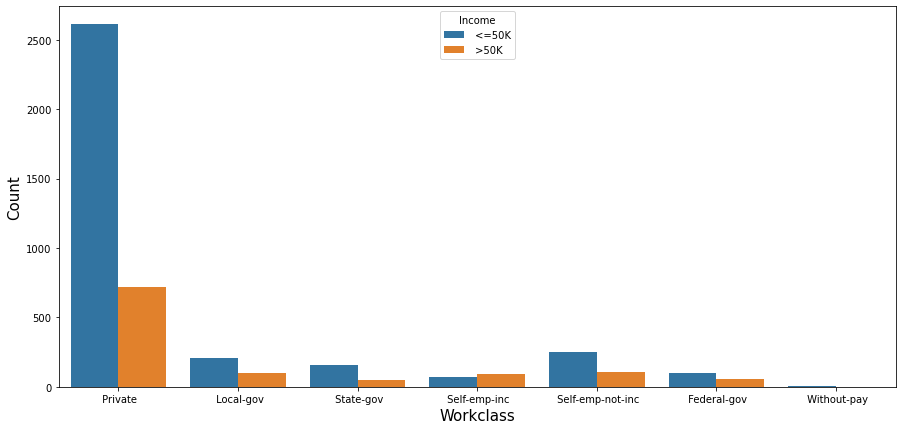

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(df['Workclass'], hue='Income', data= df)
plt.xlabel('Workclass', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

We have maximum no. of population working in Private setor whose income is <=50K. At same time pepole working in private sector are more as compared to other setcors, whose income is >=50K.

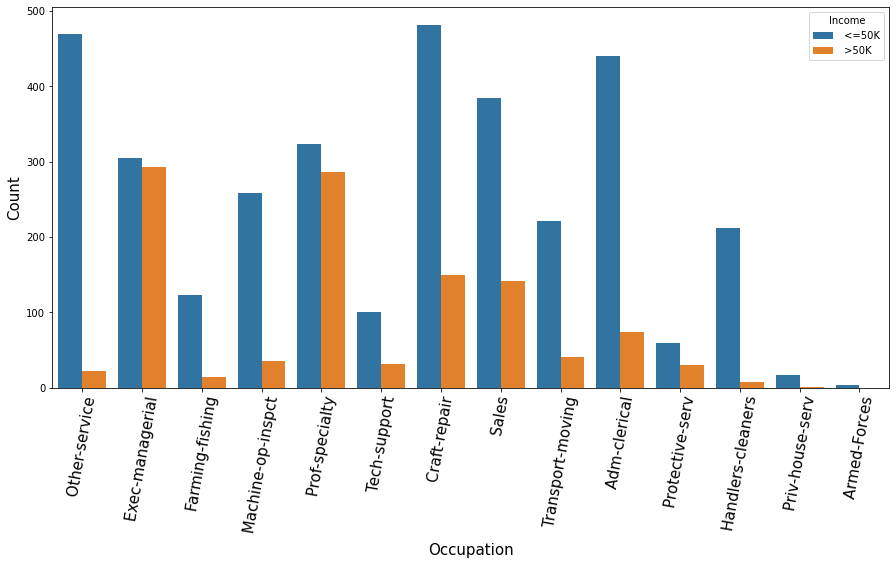

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(df['Occupation'], hue='Income', data= df)
plt.xlabel('Occupation', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Occupation like Exce-managerial and Prof-specialty having higher population with income >=50K.It indicates occupation has good impact on income.

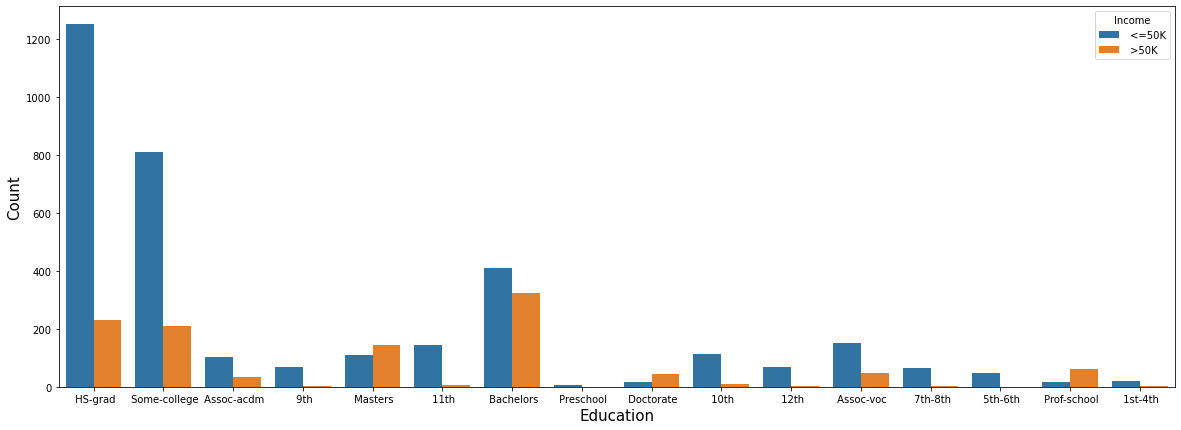

In [28]:
plt.figure(figsize=(20,7))
sns.countplot(df['Education'], hue='Income', data= df)
plt.xlabel('Education', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

The graph indicates that people with higher degree have more chance to have income >=50K.

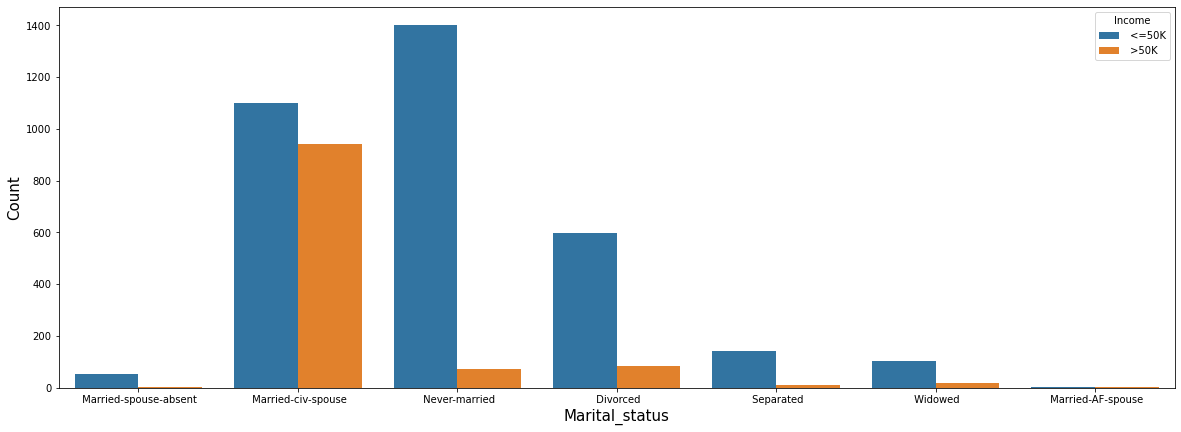

In [29]:
plt.figure(figsize=(20,7))
sns.countplot(df['Marital_status'], hue='Income', data= df)
plt.xlabel('Marital_status', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Married civ spouse population is having higher number of Income which >=50k, as compared to other columns.

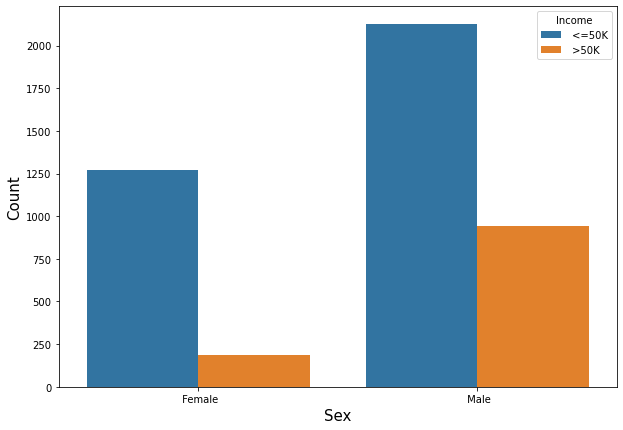

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(df['Sex'], hue='Income', data= df)
plt.xlabel('Sex', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

We can see Male is having higher count as compared to Female, for income>=50K

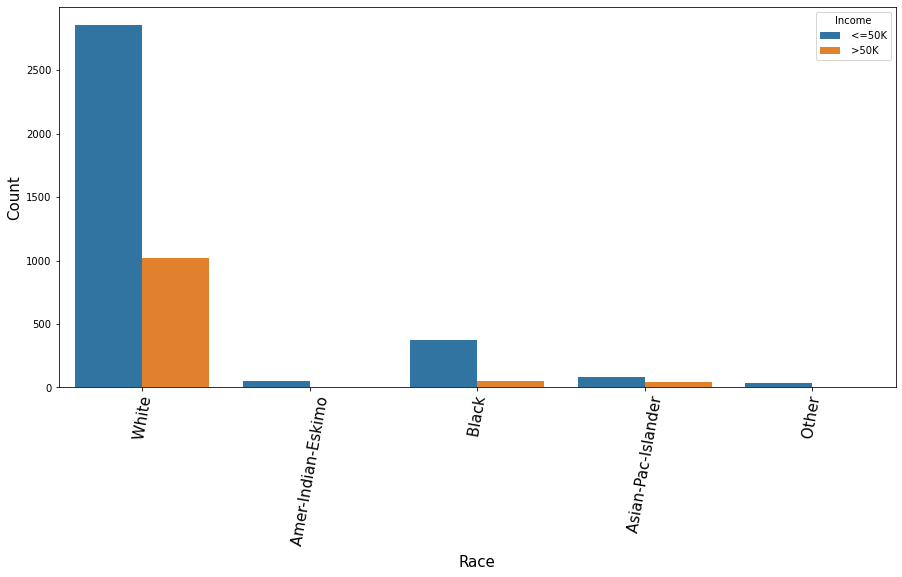

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(df['Race'], hue='Income', data= df)
plt.xlabel('Race', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

As majority of population is White, so the chance of getting income>=50K, Is higher for White.

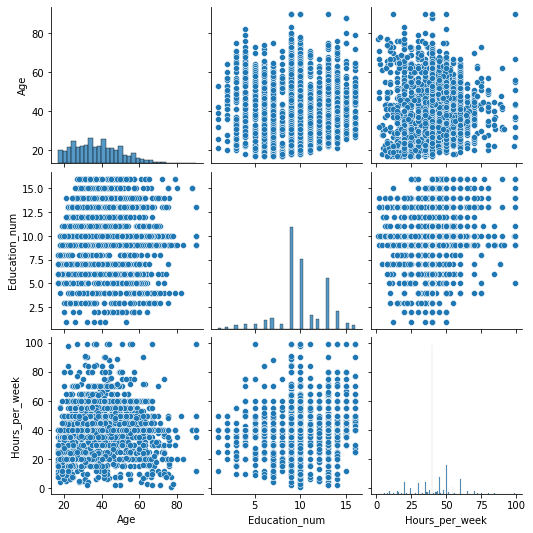

In [32]:
sns.pairplot(df)

# Checking Outliers

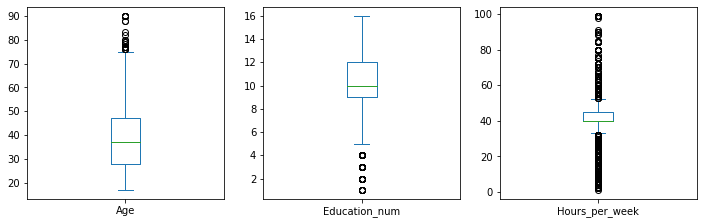

In [33]:
# Identifying the outliers using boxplot

df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

We can see outliers present more or less in all columns.

In [34]:
#Removing outliers
# Features containing outliers
features = df[["Age","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,Age,Education_num,Hours_per_week
6867,0.490565,0.440621,1.757641
11398,0.103979,0.045816,0.069285
18027,0.901147,0.743793,0.774894
5419,0.514560,0.440621,0.069285
2748,1.418374,2.019839,2.517401
...,...,...,...
15017,1.055782,1.138597,0.069285
16367,1.133099,0.440621,0.069285
18482,0.799835,2.323011,0.774894
1477,1.650326,1.230230,1.419970


In [35]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
6867,32,Private,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,White,Female,20,United-States,<=50K
11398,37,Private,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,40,United-States,<=50K
18027,50,Private,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
5419,45,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Amer-Indian-Eskimo,Male,40,United-States,<=50K
2748,20,Private,9th,5,Never-married,Machine-op-inspct,Own-child,White,Female,11,Nicaragua,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
23876,51,Local-gov,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
15017,52,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,>50K
16367,53,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
18482,28,Private,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,50,Germany,<=50K


In [36]:
# Shape of original dataset
df.shape

(4524, 12)

In [37]:
# Shape of new dataset
df_new.shape

(4421, 12)

In [38]:
# Checking the percentage data loss
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

2.2767462422634837

In [39]:
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
6867,32,Private,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,White,Female,20,United-States,<=50K
11398,37,Private,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,40,United-States,<=50K
18027,50,Private,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
5419,45,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Amer-Indian-Eskimo,Male,40,United-States,<=50K
2748,20,Private,9th,5,Never-married,Machine-op-inspct,Own-child,White,Female,11,Nicaragua,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
23876,51,Local-gov,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
15017,52,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,>50K
16367,53,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
18482,28,Private,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,50,Germany,<=50K


# Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Education']=le.fit_transform(df_new['Education'])
df_new['Workclass'] = le.fit_transform(df_new['Workclass'])
df_new['Marital_status'] = le.fit_transform(df_new['Marital_status'])
df_new['Occupation'] = le.fit_transform(df_new['Occupation'])
df_new['Relationship'] = le.fit_transform(df_new['Relationship'])
df_new['Race'] = le.fit_transform(df_new['Race'])
df_new['Sex'] = le.fit_transform(df_new['Sex'])
df_new['Native_country'] = le.fit_transform(df_new['Native_country'])
df_new['Income'] = le.fit_transform(df_new['Income']) 

In [41]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
6867,32,Private,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,White,Female,20,United-States,<=50K
11398,37,Private,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,40,United-States,<=50K
18027,50,Private,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
5419,45,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Amer-Indian-Eskimo,Male,40,United-States,<=50K
2748,20,Private,9th,5,Never-married,Machine-op-inspct,Own-child,White,Female,11,Nicaragua,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
15017,52,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,>50K
16367,53,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
18482,28,Private,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,50,Germany,<=50K
1477,17,Private,11th,7,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Female,24,United-States,<=50K


In [42]:
df_new.describe()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
count,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000
mean,38.109251,2.188419,9.222800,10.155847,2.563673,5.993893,1.472518,3.671568,0.675865,40.497851,35.572495,0.249717
std,12.637374,0.970148,3.328458,2.443276,1.523669,4.028373,1.613567,0.848624,0.468104,10.687025,5.671115,0.432898
min,17.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,28.000000,2.000000,8.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,10.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,37.000000,0.000000
75%,47.000000,2.000000,11.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,37.000000,0.000000
max,77.000000,6.000000,13.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,76.000000,39.000000,1.000000


# Skewness

In [43]:
df_new.skew()

Age               0.455993
Workclass         1.148213
Education        -1.109047
Education_num    -0.135108
Marital_status   -0.041713
Occupation        0.123434
Relationship      0.760518
Race             -2.518128
Sex              -0.751734
Hours_per_week   -0.269089
Native_country   -4.415037
Income            1.156835
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

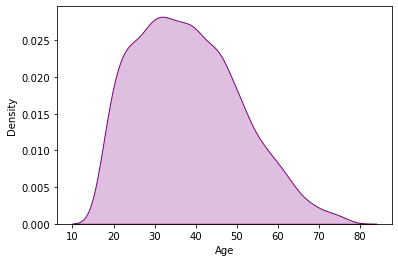

In [44]:
sns.distplot(df_new["Age"],color="purple",kde_kws={"shade": True},hist=False)

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

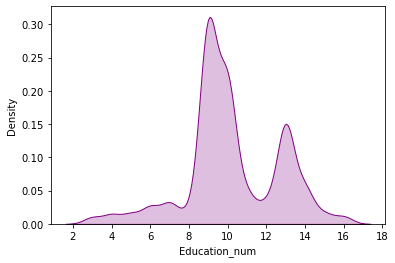

In [45]:
sns.distplot(df_new["Education_num"],color="purple",kde_kws={"shade": True},hist=False)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

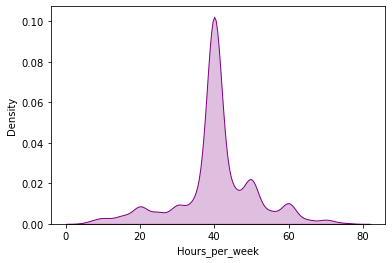

In [46]:
sns.distplot(df_new["Hours_per_week"],color="purple",kde_kws={"shade": True},hist=False)

We can see there is no skewness.

# Correlation

In [47]:
df_new.corr()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.067614,-0.012568,0.050828,-0.285006,0.005959,-0.244418,0.022333,0.049396,0.140497,0.021654,0.259357
Workclass,0.067614,1.000000,0.009207,0.056331,-0.018449,0.013725,-0.038243,0.038358,0.041850,0.028112,-0.000037,0.008612
Education,-0.012568,0.009207,1.000000,0.344791,-0.022538,-0.048849,-0.017079,0.021266,-0.026243,0.051274,0.065803,0.083381
Education_num,0.050828,0.056331,0.344791,1.000000,-0.063288,0.080665,-0.097993,0.056008,-0.024860,0.168544,0.080735,0.356139
Marital_status,-0.285006,-0.018449,-0.022538,-0.063288,1.000000,0.010661,0.160258,-0.046988,-0.074625,-0.211033,-0.036438,-0.187725
Occupation,0.005959,0.013725,-0.048849,0.080665,0.010661,1.000000,-0.040732,-0.001315,0.029185,0.008647,-0.002650,0.026173
Relationship,-0.244418,-0.038243,-0.017079,-0.097993,0.160258,-0.040732,1.000000,-0.092015,-0.566387,-0.274274,-0.024797,-0.252204
Race,0.022333,0.038358,0.021266,0.056008,-0.046988,-0.001315,-0.092015,1.000000,0.070825,0.075584,0.096995,0.071802
Sex,0.049396,0.041850,-0.026243,-0.024860,-0.074625,0.029185,-0.566387,0.070825,1.000000,0.217054,0.004038,0.195210
Hours_per_week,0.140497,0.028112,0.051274,0.168544,-0.211033,0.008647,-0.274274,0.075584,0.217054,1.000000,0.007570,0.237687


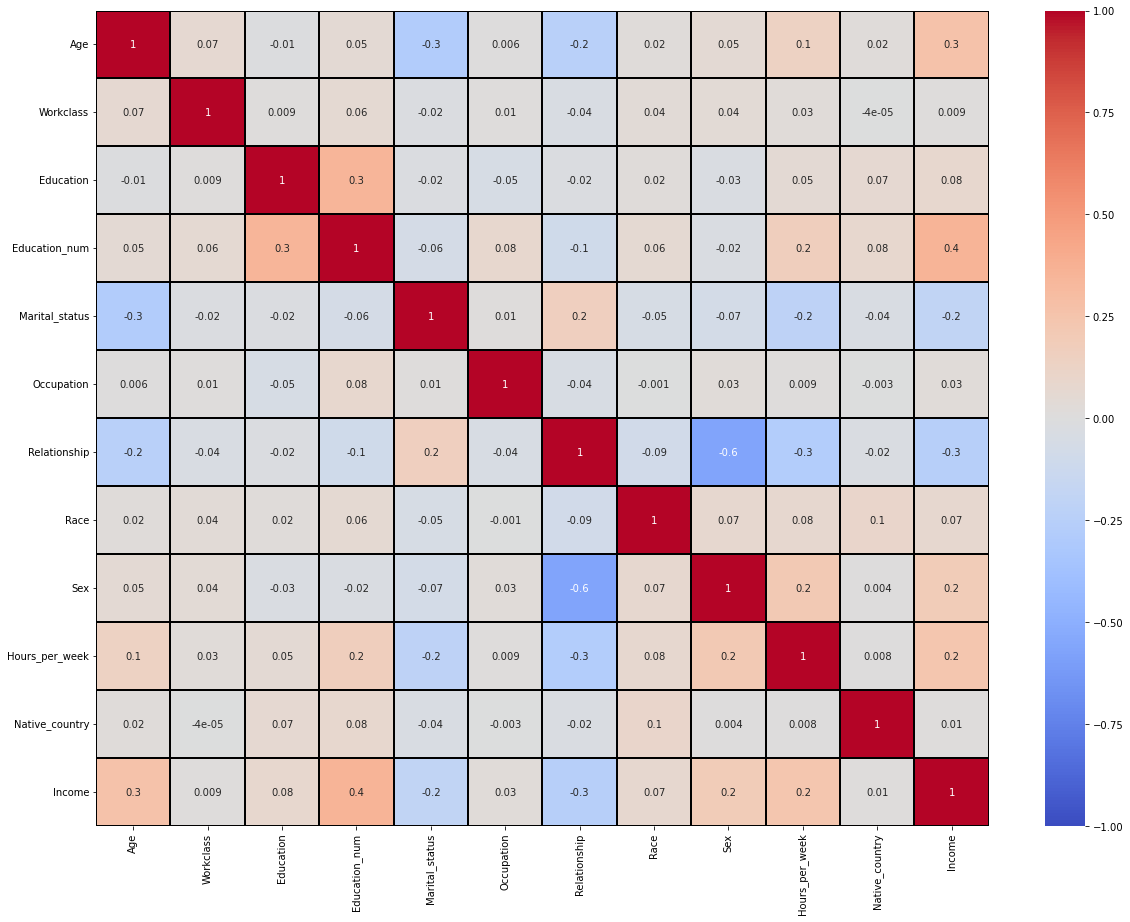

In [48]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue. Workclass,Native_country, Occupation, Race and Education has less correlation with target. The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target.

As there is no skewness/multicolineraity issue, we can proceed with the model.

Splitting Of Data

In [49]:
# splitting x and y
x=df_new.drop("Income",axis=1)
y=df_new["Income"]

# Finding Best Random State

In [50]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8225988700564971 on Random_State 84


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [53]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.8203389830508474
[[620  42]
 [117 106]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       662
           1       0.72      0.48      0.57       223

    accuracy                           0.82       885
   macro avg       0.78      0.71      0.73       885
weighted avg       0.81      0.82      0.81       885

Cross Validation Score: 0.8000442262954724
Difference Between Accuracy Score and CrossValidation Score: 0.020294756755374954


Accuracy score: of SVC()
0.7875706214689265
[[633  29]
 [159  64]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       662
           1       0.69      0.29      0.41       223

    accuracy                           0.79       885
   macro avg       0.74      0.62      0.64       885
weighted avg       0.77      0.79      0.75       885

Cross Validation Score: 0.7934821177493161
Difference Between Accuracy

We can see Random Forest Classifier is performing better than other models.

# Hyper Parameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

parameters = {'max_depth': np.arange(8,20), 
              'max_features': ['sqrt','auto', 'log2'], 
              'n_estimators': [92,95,97,98,100,102,105,107,109],
              'criterion' :['gini','entropy','log_loss'] }

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 5)
grid_rf.fit(x,y)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

{'criterion': 'log_loss', 'max_depth': 11, 'max_features': 'sqrt', 'n_estimators': 105}
0.8332916634711249


In [55]:
rf1=RandomForestClassifier(max_features ='sqrt', max_depth= 10,criterion= 'gini',n_estimators=102)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(max_depth=10, n_estimators=102)
0.8451977401129943
[[616  46]
 [ 91 132]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       662
           1       0.74      0.59      0.66       223

    accuracy                           0.85       885
   macro avg       0.81      0.76      0.78       885
weighted avg       0.84      0.85      0.84       885



# ROC AUC

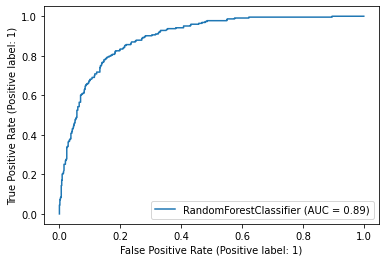

In [56]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf1,x_test,y_test)
#plot_roc_curve(rf1, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix

plt.show()

The score is good, we can save the model.

# Saving The Model

In [57]:
# Saving the model using .pkl
import pickle
filename='Census_Income.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion

In [58]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(10)

,original,Predicted
8,0,0
370,0,0
160,0,0
144,0,0
217,0,0
285,0,0
17,0,0
748,0,0
396,0,0
502,0,0
